# Bacteria-phage with mutation test

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import island_evo_simulation_methods as ie
from scipy.stats import norm
plt.style.use('researchfigs')

In [3]:
plt.style.use('researchfigs')

In this notebook we test the functions for mutational dynamics with bacteria and phage.

## Random invasion

We first test the case of random invasion with random $G$ and $H$, with covariance $\gamma = -0.9$.
As expected, this behaves much like the normal Lotka-Volterra case.

In [3]:
D = 20
B = 120
P = 120
F = 2
M_b = 10
M_p = 10
omega_b = 2.0
omega_p = 1.0
thresh_b = -8.0*M_b
thresh_p = -8.0*M_p
inv_fac_b = np.exp(5.0)
inv_fac_p = np.exp(5.0)
dt = 0.1
mu_b = 3
mu_p = 4
D_b = None
D_p = None
seed = 101
epoch_timescale = 20.
epoch_num = 50
sample_num = 20


file_name = 'bp_evo_test_rand_inv'

# interaction function

gamma = -0.9

def S(v,w):
    vec_seed = hash(str(v)+str(w))%(2**31)
    np.random.seed(vec_seed)
    
    Z_1 = np.random.randn()
    Z_2 = np.random.randn()
    
    G = Z_1
    H = gamma*Z_1+np.sqrt(1-gamma**2)*Z_2
    
    np.random.seed()
    return G,H


In [49]:
seed = 100

ie.bp_evo(file_name, D, B, P, F, M_b, M_p, omega_b, omega_p, thresh_b, thresh_p,
              inv_fac_b, inv_fac_p, dt, mu_b, mu_p,D_b, D_p, S, seed, epoch_timescale, epoch_num, sample_num)

/home/atish/Dropbox/Ecology/Bacteria phage code/island-evo/island_evo_simulation_methods.py:1621: RuntimeWarning: divide by zero encountered in true_divide
  temp_rats = np.divide(bbar, b0)  # remove infinities
/home/atish/Dropbox/Ecology/Bacteria phage code/island-evo/island_evo_simulation_methods.py:1990: RuntimeWarning: divide by zero encountered in log
  x = np.log(n)
/home/atish/Dropbox/Ecology/Bacteria phage code/island-evo/island_evo_simulation_methods.py:1621: RuntimeWarning: invalid value encountered in true_divide
  temp_rats = np.divide(bbar, b0)  # remove infinities
/home/atish/Dropbox/Ecology/Bacteria phage code/island-evo/island_evo_simulation_methods.py:1629: RuntimeWarning: divide by zero encountered in true_divide
  temp_rats = np.divide(pbar, p0)  # remove infinities
/home/atish/Dropbox/Ecology/Bacteria phage code/island-evo/island_evo_simulation_methods.py:1629: RuntimeWarning: invalid value encountered in true_divide
  temp_rats = np.divide(pbar, p0)  # remove infin

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51


In [50]:
with np.load(file_name+'.npz') as data:
    exp_data = data['class_obj'].item()


In [51]:
exp_data.keys()

dict_keys(['file_name', 'D', 'B', 'P', 'F', 'M_b', 'M_p', 'omega_b', 'omega_p', 'thresh_b', 'thresh_p', 'inv_fac_b', 'inv_fac_p', 'epoch_timescale', 'epoch_num', 'dt', 'mu_b', 'mu_p', 'D_b', 'D_p', 'S', 'seed', 'sample_num', 'N', 'm_b', 'm_p', 'B_tot', 'P_tot', 'vs', 'ws', 'increment', 'dt_list', 'epoch_time_list', 'lambda_b_mean_ave_list', 'lambda_b_mean_std_list', 'lambda_p_mean_ave_list', 'lambda_p_mean_std_list', 'b_init_list', 'b_mean_ave_list', 'b2_mean_ave_list', 'b_mig_mean_list', 'eta_b_list', 'b_mean_std_list', 'b2_mean_std_list', 'b_extinct_time_array', 'b_alive', 'p_init_list', 'p_mean_ave_list', 'p2_mean_ave_list', 'p_mig_mean_list', 'eta_p_list', 'p_mean_std_list', 'p2_mean_std_list', 'p_extinct_time_array', 'p_alive', 'b_traj_eq', 'p_traj_eq', 'b_traj_f', 'p_traj_f'])

Text(0.5,1,'Number of types vs. epoch, $\\mu_b = 3$ $\\mu_p = 4$')

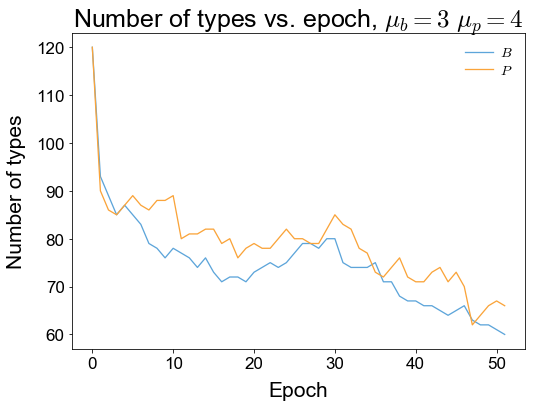

In [52]:
plt.figure()
plt.plot(np.sum(exp_data['b_alive'],axis=0),label='$B$')
plt.plot(np.sum(exp_data['p_alive'],axis=0),label='$P$')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Number of types')
plt.title('Number of types vs. epoch, $\mu_b = {}$ $\mu_p = {}$'.format(exp_data['mu_b'],exp_data['mu_p']))

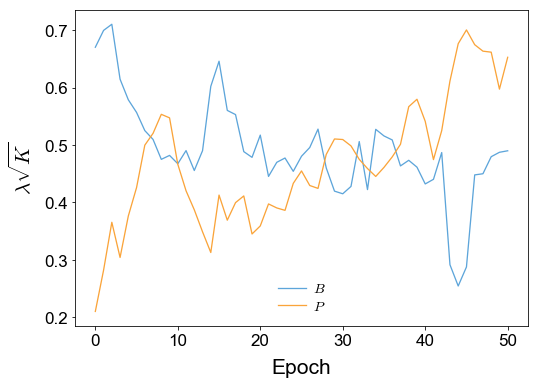

In [53]:
plt.figure()
plt.plot(exp_data['lambda_b_mean_ave_list']*np.sqrt(np.sum(exp_data['b_alive'][:,1:],axis=0)),label='$B$')
plt.plot(exp_data['lambda_p_mean_ave_list']*np.sqrt(np.sum(exp_data['p_alive'][:,1:],axis=0)),label='$P$')
plt.ylabel('$\lambda\sqrt{K}$')
plt.xlabel('Epoch')
plt.legend()

In [9]:
def int_from_pheno(S,vs,ws):
    B = np.shape(vs)[1]
    P = np.shape(ws)[1]
    G = np.zeros((P,B))
    H = np.zeros((B,P))

    for i in range(B):
        for j in range(P):
            G[j,i], H[i,j] = S(vs[:,i],ws[:,j])

    return G,H

In [10]:
G,H = int_from_pheno(S,exp_data['vs'],exp_data['ws'])

In [11]:
def gen_random_phenos(F,B,P):
    vs = np.random.randn(F,B)
    ws = np.random.randn(F,P)

    for i in range(B):
        vs[:,i] = vs[:,i]/np.linalg.norm(vs[:,i])

    for j in range(P):
        ws[:, j] = ws[:, j] / np.linalg.norm(ws[:, j])

    return vs, ws

In [24]:
exp_data['ws']

array([[-0.02204295, -0.27692334,  0.50783143, -0.96374581,  0.83702416,
        -0.91563439,  0.40000116,  0.92074532, -0.96632361, -0.09618449,
         0.99651709, -0.74304715,  0.51555923, -0.81856494, -0.12019791,
         0.87542993,  0.23814899, -0.02152466, -0.8246829 , -0.94278546,
        -0.73969873, -0.07950389,  0.20476135, -0.82571234,  0.90266076,
        -0.27239924, -0.96988527, -0.75915857,  0.94029236,  0.45372757,
         0.75145997,  0.42502906,  0.8393599 ,  0.86604846, -0.93264759,
         0.59551385, -0.82966025,  0.72793456, -0.30386886,  0.99337464,
         0.74053964, -0.9983205 ,  0.18339445, -0.12997318,  0.06334859,
         0.79072881,  0.60116652, -0.98175224,  0.50055147, -0.30010052,
         0.67469015, -0.97430714,  0.77918099, -0.73098243,  0.23693017,
        -0.93543408,  0.95997303, -0.10252235,  0.99624274,  0.85629251,
        -0.59779208,  0.99967292,  0.28340341,  0.80827995, -0.25179678,
        -0.95067456, -0.48174247, -0.40476549,  0.9

In [54]:
N_b = np.exp(-thresh_b)
t_max = exp_data['dt_list'][0]*np.shape(exp_data['b_traj_eq'])[1]

Text(0.5,1.03,'Bact. dynamics first evolutionary point')

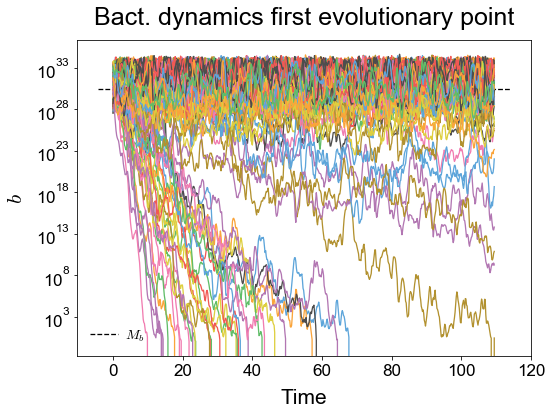

In [55]:
plt.figure()
plt.plot(exp_data['dt_list'][0]*np.arange(np.shape(exp_data['b_traj_eq'])[1]),N_b*exp_data['b_traj_eq'].T)
plt.yscale('log')
plt.hlines(y = N_b*np.exp(-M_b),xmin=-0.04*t_max,
           xmax=1.04*t_max,
           linestyle='--',color='k',label='$M_b$')
plt.legend()
plt.xlabel('Time')
plt.ylabel('$b$')
plt.title('Bact. dynamics first evolutionary point',y=1.03)

In [56]:
N_p = np.exp(-thresh_p)
t_max = exp_data['dt_list'][0]*np.shape(exp_data['p_traj_eq'])[1]

Text(0.5,1.03,'Phage dynamics first evolutionary point')

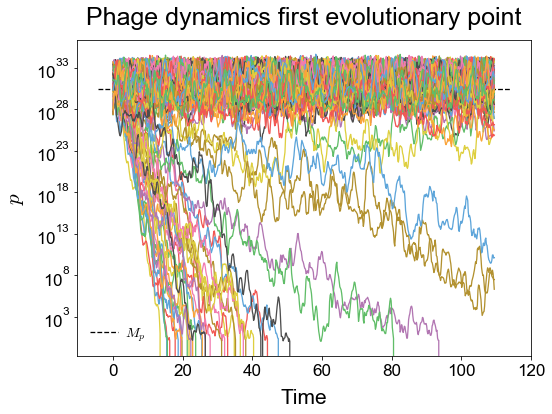

In [57]:
plt.figure()
plt.plot(exp_data['dt_list'][0]*np.arange(np.shape(exp_data['p_traj_eq'])[1]),N_p*exp_data['p_traj_eq'].T)
plt.yscale('log')
plt.hlines(y = N_b*np.exp(-M_b),xmin=-0.04*t_max,
           xmax=1.04*t_max,
           linestyle='--',color='k',label='$M_p$')
plt.legend()
plt.xlabel('Time')
plt.ylabel('$p$')
plt.title('Phage dynamics first evolutionary point',y=1.03)

In [58]:
N_b = np.exp(-thresh_b)
t_max = exp_data['dt_list'][-1]*np.shape(exp_data['b_traj_f'])[1]

Text(0.5,1.03,'Bact. dynamics final evolutionary point')

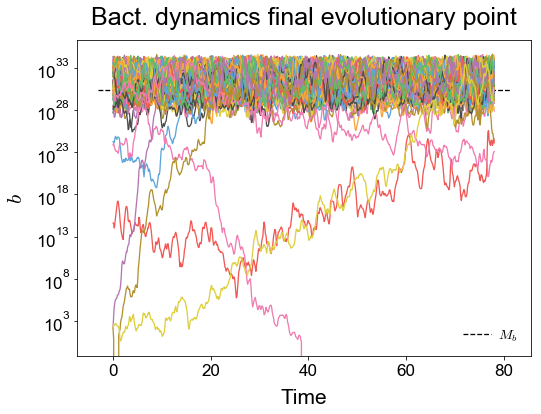

In [59]:
plt.figure()
plt.plot(exp_data['dt_list'][-1]*np.arange(np.shape(exp_data['b_traj_f'])[1]),N_b*exp_data['b_traj_f'].T)
plt.yscale('log')
plt.hlines(y = N_b*np.exp(-M_b),xmin=-0.04*t_max,
           xmax=1.04*t_max,
           linestyle='--',color='k',label='$M_b$')
plt.legend()
plt.xlabel('Time')
plt.ylabel('$b$')
plt.title('Bact. dynamics final evolutionary point',y=1.03)

In [60]:
N_p = np.exp(-thresh_p)
t_max = exp_data['dt_list'][-1]*np.shape(exp_data['p_traj_f'])[1]

Text(0.5,1.03,'Phage dynamics final evolutionary point')

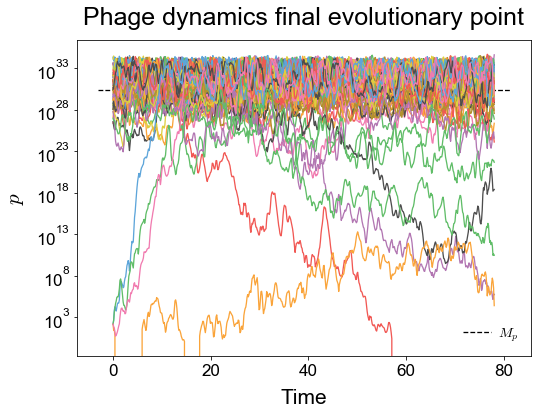

In [61]:
plt.figure()
plt.plot(exp_data['dt_list'][-1]*np.arange(np.shape(exp_data['p_traj_f'])[1]),N_p*exp_data['p_traj_f'].T)
plt.yscale('log')
plt.hlines(y = N_b*np.exp(-M_b),xmin=-0.04*t_max,
           xmax=1.04*t_max,
           linestyle='--',color='k',label='$M_p$')
plt.legend()
plt.xlabel('Time')
plt.ylabel('$p$')
plt.title('Phage dynamics final evolutionary point',y=1.03)

## Local mutations + phenotype

### Smooth phenotype, ecological dynamics

Below are some explorations of the ecological dynamics for smooth phenotypes; these are done in
more detail in the `bp_eco_test` notebook so look there for more detailed commentary.

In [370]:
D = 1
B = 300
P = 300
F = 8
M_b = 10
M_p = 10
omega_b = 2.0
omega_p = 1.0
thresh_b = -8.0*M_b
thresh_p = -8.0*M_p
inv_fac_b = np.exp(5.0)
inv_fac_p = np.exp(5.0)
dt = 0.5
mu_b = 0
mu_p = 0
D_b = 0.01
D_p = 0.01
seed = 101
epoch_timescale = 200.
epoch_num = 20
sample_num = 20


file_name = 'bp_evo_test_smooth_pheno_eco'

# interaction function

gamma = -0.95

def dist(v,w):
    return np.sqrt(2*(1-np.dot(v,w)))

l_c = 1.0

sig_S = np.sqrt(np.var(np.exp(-np.sqrt(2)*(1+np.random.randn(200)/(F**0.5))/(l_c))))

def S(v,w):
    
    S_val = np.exp(-dist(v,w)/l_c)
    
    
    G = S_val
    H = -S_val
    
    return G,H


In [371]:
sig_S

0.1453770441829772

In [372]:
seed = 100

ie.bp_evo(file_name, D, B, P, F, M_b, M_p, omega_b, omega_p, thresh_b, thresh_p,
              inv_fac_b, inv_fac_p, dt, mu_b, mu_p,D_b, D_p, S, seed, epoch_timescale, epoch_num, sample_num)

/home/atish/Dropbox/Ecology/Bacteria phage code/island-evo/island_evo_simulation_methods.py:1990: RuntimeWarning: divide by zero encountered in log
  x = np.log(n)
/home/atish/Dropbox/Ecology/Bacteria phage code/island-evo/island_evo_simulation_methods.py:1621: RuntimeWarning: invalid value encountered in true_divide
  temp_rats = np.divide(bbar, b0)  # remove infinities


1


/home/atish/Dropbox/Ecology/Bacteria phage code/island-evo/island_evo_simulation_methods.py:1629: RuntimeWarning: invalid value encountered in true_divide
  temp_rats = np.divide(pbar, p0)  # remove infinities


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


In [373]:
with np.load(file_name+'.npz') as data:
    exp_data = data['class_obj'].item()


In [374]:
exp_data.keys()

dict_keys(['file_name', 'D', 'B', 'P', 'F', 'M_b', 'M_p', 'omega_b', 'omega_p', 'thresh_b', 'thresh_p', 'inv_fac_b', 'inv_fac_p', 'epoch_timescale', 'epoch_num', 'dt', 'mu_b', 'mu_p', 'D_b', 'D_p', 'S', 'seed', 'sample_num', 'N', 'm_b', 'm_p', 'B_tot', 'P_tot', 'vs', 'ws', 'increment', 'dt_list', 'epoch_time_list', 'lambda_b_mean_ave_list', 'lambda_b_mean_std_list', 'lambda_p_mean_ave_list', 'lambda_p_mean_std_list', 'b_init_list', 'b_mean_ave_list', 'b2_mean_ave_list', 'b_mig_mean_list', 'eta_b_list', 'b_mean_std_list', 'b2_mean_std_list', 'b_extinct_time_array', 'b_alive', 'p_init_list', 'p_mean_ave_list', 'p2_mean_ave_list', 'p_mig_mean_list', 'eta_p_list', 'p_mean_std_list', 'p2_mean_std_list', 'p_extinct_time_array', 'p_alive', 'b_traj_eq', 'p_traj_eq', 'b_traj_f', 'p_traj_f'])

Text(0.5,1,'Number of types vs. epoch, $\\mu_b = 0$ $\\mu_p = 0$')

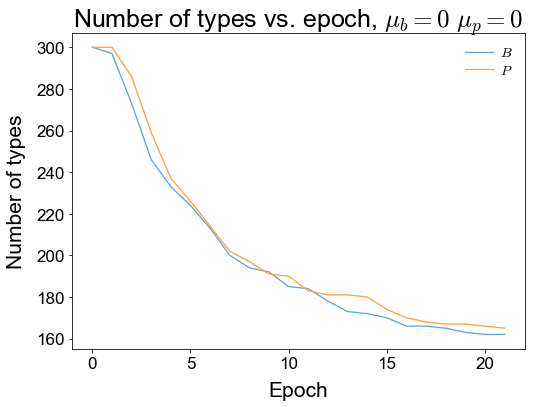

In [375]:
plt.figure()
plt.plot(np.sum(exp_data['b_alive'],axis=0),label='$B$')
plt.plot(np.sum(exp_data['p_alive'],axis=0),label='$P$')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Number of types')
plt.title('Number of types vs. epoch, $\mu_b = {}$ $\mu_p = {}$'.format(exp_data['mu_b'],exp_data['mu_p']))

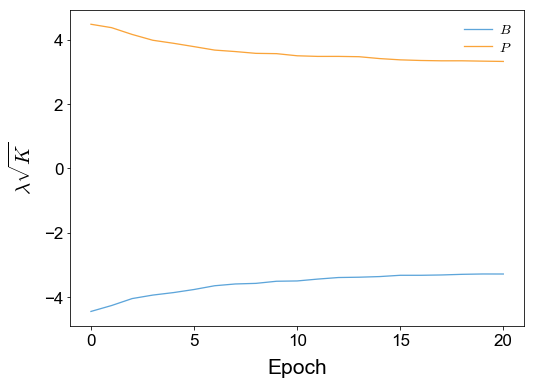

In [376]:
plt.figure()
plt.plot(exp_data['lambda_b_mean_ave_list']*np.sqrt(np.sum(exp_data['b_alive'][:,1:],axis=0)),label='$B$')
plt.plot(exp_data['lambda_p_mean_ave_list']*np.sqrt(np.sum(exp_data['p_alive'][:,1:],axis=0)),label='$P$')
plt.ylabel('$\lambda\sqrt{K}$')
plt.xlabel('Epoch')
plt.legend()

In [377]:
exp_data['ws']

array([[-0.23759311,  0.02858891, -0.37157718, ...,  0.0491333 ,
         0.03192188,  0.041866  ],
       [-0.1130731 ,  0.12842472,  0.11799187, ..., -0.51682175,
         0.00278413, -0.18539997],
       [-0.02845161,  0.81312773,  0.1532496 , ..., -0.00295598,
        -0.67719646,  0.84245365],
       ...,
       [-0.47901649,  0.13524551, -0.59666649, ..., -0.29953088,
         0.31474029,  0.39720616],
       [ 0.39937906,  0.46165416,  0.32512956, ...,  0.22288133,
        -0.23236122,  0.09202095],
       [ 0.42824655, -0.01488681, -0.28121608, ...,  0.35489841,
         0.04303762,  0.05754155]])

In [378]:
N_b = np.exp(-thresh_b)
t_max = exp_data['dt_list'][0]*np.shape(exp_data['b_traj_eq'])[1]

Text(0.5,1.03,'Bact. dynamics first evolutionary point')

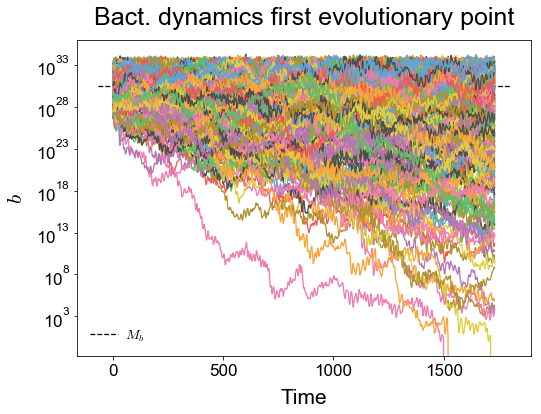

In [379]:
plt.figure()
plt.plot(exp_data['dt_list'][0]*np.arange(np.shape(exp_data['b_traj_eq'])[1]),N_b*exp_data['b_traj_eq'].T)
plt.yscale('log')
plt.hlines(y = N_b*np.exp(-M_b),xmin=-0.04*t_max,
           xmax=1.04*t_max,
           linestyle='--',color='k',label='$M_b$')
plt.legend()
plt.xlabel('Time')
plt.ylabel('$b$')
plt.title('Bact. dynamics first evolutionary point',y=1.03)

In [380]:
N_p = np.exp(-thresh_p)
t_max = exp_data['dt_list'][0]*np.shape(exp_data['p_traj_eq'])[1]

Text(0.5,1.03,'Phage dynamics first evolutionary point')

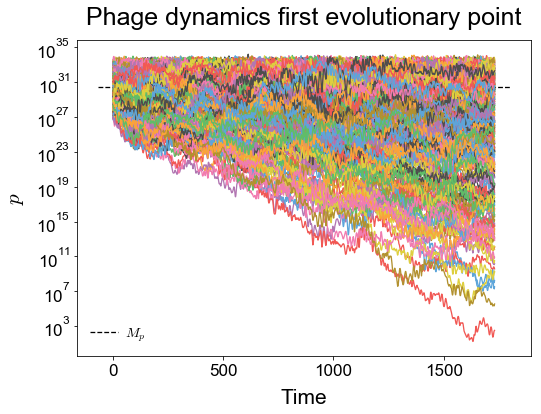

In [381]:
plt.figure()
plt.plot(exp_data['dt_list'][0]*np.arange(np.shape(exp_data['p_traj_eq'])[1]),N_p*exp_data['p_traj_eq'].T)
plt.yscale('log')
plt.hlines(y = N_b*np.exp(-M_b),xmin=-0.04*t_max,
           xmax=1.04*t_max,
           linestyle='--',color='k',label='$M_p$')
plt.legend()
plt.xlabel('Time')
plt.ylabel('$p$')
plt.title('Phage dynamics first evolutionary point',y=1.03)

In [382]:
N_b = np.exp(-thresh_b)
t_max = exp_data['dt_list'][-1]*np.shape(exp_data['b_traj_f'])[1]

Text(0.5,1.03,'Bact. dynamics final evolutionary point')

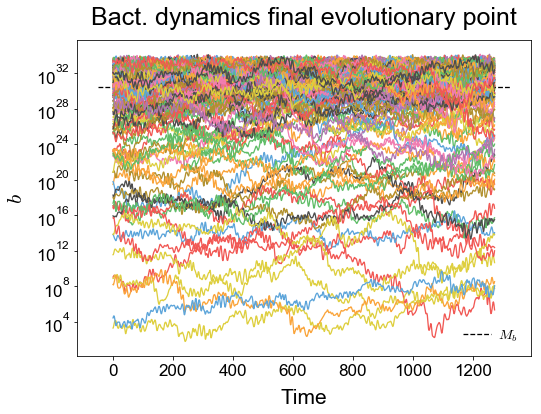

In [383]:
plt.figure()
plt.plot(exp_data['dt_list'][-1]*np.arange(np.shape(exp_data['b_traj_f'])[1]),N_b*exp_data['b_traj_f'].T)
plt.yscale('log')
plt.hlines(y = N_b*np.exp(-M_b),xmin=-0.04*t_max,
           xmax=1.04*t_max,
           linestyle='--',color='k',label='$M_b$')
plt.legend()
plt.xlabel('Time')
plt.ylabel('$b$')
plt.title('Bact. dynamics final evolutionary point',y=1.03)

In [384]:
N_p = np.exp(-thresh_p)
t_max = exp_data['dt_list'][-1]*np.shape(exp_data['p_traj_f'])[1]

Text(0.5,1.03,'Phage dynamics final evolutionary point')

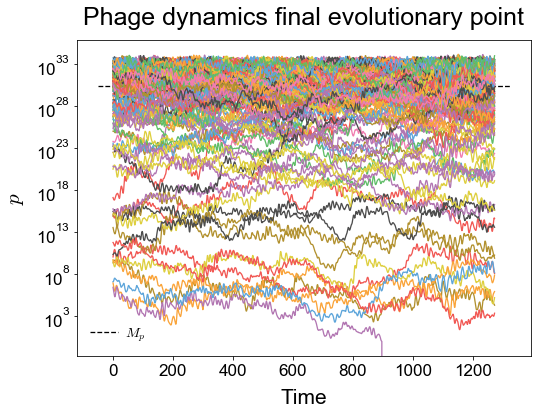

In [385]:
plt.figure()
plt.plot(exp_data['dt_list'][-1]*np.arange(np.shape(exp_data['p_traj_f'])[1]),N_p*exp_data['p_traj_f'].T)
plt.yscale('log')
plt.hlines(y = N_b*np.exp(-M_b),xmin=-0.04*t_max,
           xmax=1.04*t_max,
           linestyle='--',color='k',label='$M_p$')
plt.legend()
plt.xlabel('Time')
plt.ylabel('$p$')
plt.title('Phage dynamics final evolutionary point',y=1.03)

In [386]:
# recover interaction matrices

def int_from_pheno(S,vs,ws):
    B = np.shape(vs)[1]
    P = np.shape(ws)[1]
    G = np.zeros((P,B))
    H = np.zeros((B,P))

    for i in range(B):
        for j in range(P):
            G[j,i], H[i,j] = S(vs[:,i],ws[:,j])

    return G,H

G,H = int_from_pheno(S,exp_data['vs'],exp_data['ws'])


In [387]:
# average values of abundance/abundance squared

T = exp_data['epoch_num']+1
b_alive = exp_data['b_alive']
p_alive = exp_data['p_alive']

B = exp_data['B']
P = exp_data['P']

b_ave = np.zeros((B,T))
p_ave = np.zeros((P,T))

b2_ave = np.zeros((B,T))
p2_ave = np.zeros((P,T))

eta_b = np.zeros((B,T))
eta_p = np.zeros((P,T))

for i in range(T):
    b_ave[b_alive[:,i],i] = exp_data['b_mean_ave_list'][i]
    b2_ave[b_alive[:,i],i] = exp_data['b2_mean_ave_list'][i]
    eta_b[b_alive[:,i],i] = exp_data['eta_b_list'][i]
    
    p_ave[p_alive[:,i],i] = exp_data['p_mean_ave_list'][i]
    p2_ave[p_alive[:,i],i] = exp_data['p2_mean_ave_list'][i]
    eta_p[p_alive[:,i],i] = exp_data['eta_p_list'][i]


Below are some plots of various averages, including $\eta_{b}$. It seems that $\eta_{b}$ is non-Gaussian
in the phenotype model.

Text(0.5,1.03,'Epoch averaged $p$')

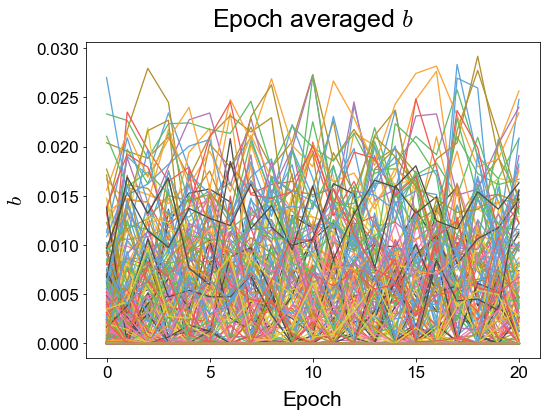

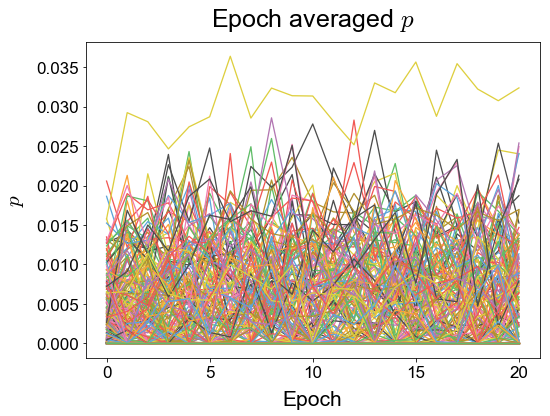

In [388]:
plt.figure()
plt.plot(b_ave.T)
plt.xlabel('Epoch')
plt.ylabel('$b$')
plt.title("Epoch averaged $b$",y=1.03)

plt.figure()
plt.plot(p_ave.T)
plt.xlabel('Epoch')
plt.ylabel('$p$')
plt.title("Epoch averaged $p$",y=1.03)


Text(0.5,1.03,'Epoch averaged $p^2$')

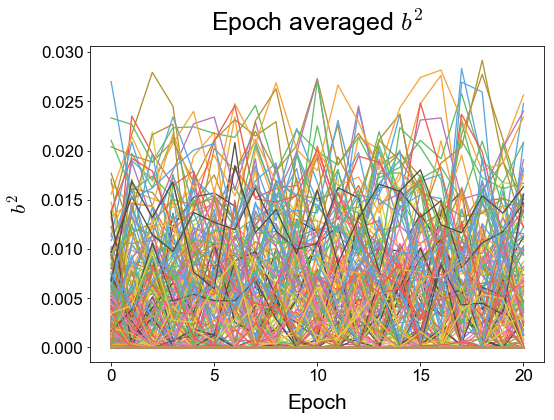

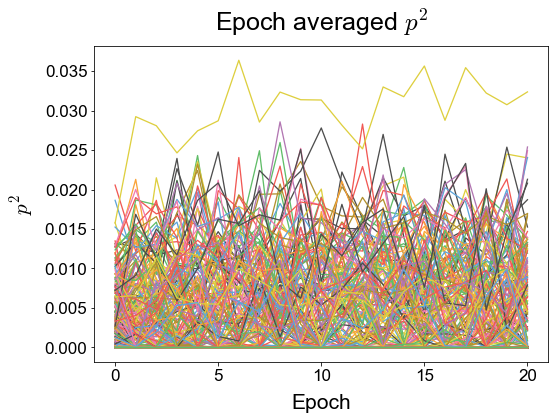

In [389]:
plt.figure()
plt.plot(b2_ave.T)
plt.xlabel('Epoch')
plt.ylabel('$b^2$')
plt.title("Epoch averaged $b^2$",y=1.03)

plt.figure()
plt.plot(p2_ave.T)
plt.xlabel('Epoch')
plt.ylabel('$p^2$')
plt.title("Epoch averaged $p^2$",y=1.03)


Text(0.5,1.03,'Epoch averaged $\\eta_{p}$')

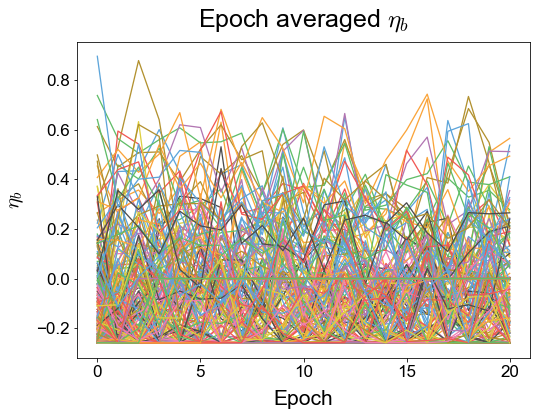

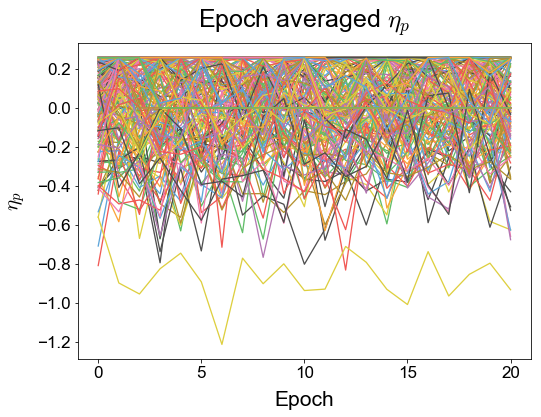

In [390]:
plt.figure()
plt.plot(eta_b.T)
plt.xlabel('Epoch')
plt.ylabel('$\eta_b$')
plt.title("Epoch averaged $\eta_{b}$",y=1.03)

plt.figure()
plt.plot(eta_p.T)
plt.xlabel('Epoch')
plt.ylabel('$\eta_p$')
plt.title("Epoch averaged $\eta_{p}$",y=1.03)


(array([  1.,   0.,   0.,   1.,   6.,  13.,  23.,  49., 131.,  76.]),
 array([-0.86458207, -0.75228665, -0.63999123, -0.52769581, -0.41540039,
        -0.30310497, -0.19080955, -0.07851413,  0.03378129,  0.14607671,
         0.25837213]),
 <a list of 10 Patch objects>)

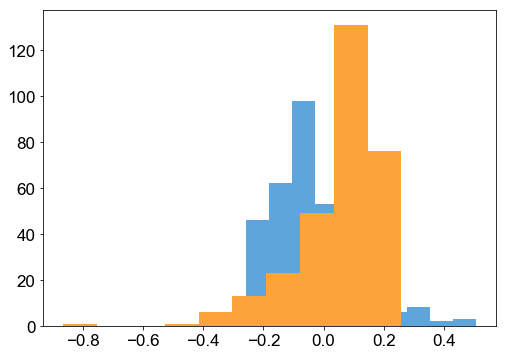

In [391]:
plt.figure()
plt.hist(np.mean(eta_b,axis=1),label="$\eta_{b}$")
plt.hist(np.mean(eta_p,axis=1),label="$\eta_{p}$")

In [394]:
eta_b_eq = H[np.ix_(exp_data['b_alive'][:,1],exp_data['p_alive'][:,1])]@exp_data['p_traj_eq'][exp_data['p_alive'][:,1],:]
eta_p_eq = G[np.ix_(exp_data['p_alive'][:,1],exp_data['b_alive'][:,1])]@exp_data['b_traj_eq'][exp_data['b_alive'][:,1],:]

lambda_b_eq = np.dot(exp_data['b_traj_eq'][exp_data['b_alive'][:,1],-1],eta_b_eq)
lambda_p_eq = np.dot(exp_data['p_traj_eq'][exp_data['p_alive'][:,1],-1],eta_p_eq)

eta_b_samp = eta_b_eq[:,-1]
eta_p_samp = eta_p_eq[:,-1]

lambda_b_samp = lambda_b_eq[-1]
lambda_p_samp = lambda_p_eq[-1]

eta_b_ave = np.mean(eta_b_eq,axis=1)
eta_p_ave = np.mean(eta_p_eq,axis=1)

lambda_b_ave = np.mean(lambda_b_eq)
lambda_p_ave = np.mean(lambda_p_eq)

eta_b_ave = np.mean(eta_b,axis=1)/np.sqrt(B)
eta_p_ave = np.mean(eta_p,axis=1)/np.sqrt(P)


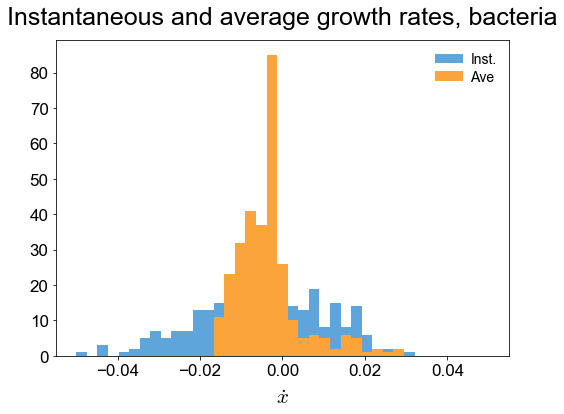

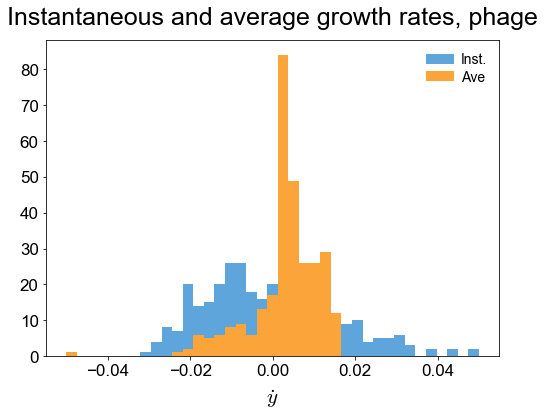

In [395]:
bin_vec = np.linspace(-0.05,0.05,40)

plt.figure()
plt.hist(eta_b_samp-lambda_b_samp,label='Inst.',bins=bin_vec)
plt.hist(eta_b_ave,label='Ave',bins=bin_vec)
plt.xlabel('$\dot{x}$')
plt.title("Instantaneous and average growth rates, bacteria",y=1.03)
plt.legend()

plt.figure()
plt.hist(eta_p_samp-lamb_p_samp,label='Inst.',bins=bin_vec)
plt.hist(eta_p_ave,label='Ave',bins=bin_vec)
plt.xlabel('$\dot{y}$')
plt.title("Instantaneous and average growth rates, phage",y=1.03)
plt.legend()

In [396]:
np.shape(exp_data['p_traj_f'])

(166, 1250)

In [397]:
np.sum(exp_data['p_alive'][:,-2])

166

### Smooth phenotype+evolution

Here we test out evolution in the smooth phenotype model, initially with random phenotype invasions. We write
$G_{vw} = (1+z_{1})S(v,w)$ and $H_{vw} = -(1+z_{2})S(v,w)$, where the $z_{i}$ are independent random variables
with variances chosen to give us the covariance $\gamma$ between $G$ and $H$.

One immediate thing to note is that the dynamics of the phenotype model are very unstable in $\gamma$,
in two senses. The first is that the relevant $dt$ needed is smaller than expected for even small
$\epsilon\equiv 1+\gamma$. The second is that the ecological dynamics themselves seem to be unstable;
even for $\epsilon = -0.9$, most types go extinct very quickly.


In [5]:
def gen_random_phenos(F,B,P):
    vs = np.random.randn(F,B)
    ws = np.random.randn(F,P)

    for i in range(B):
        vs[:,i] = vs[:,i]/np.linalg.norm(vs[:,i])

    for j in range(P):
        ws[:, j] = ws[:, j] / np.linalg.norm(ws[:, j])

    return vs, ws

def int_from_pheno(S,vs,ws):
    B = np.shape(vs)[1]
    P = np.shape(ws)[1]
    G = np.zeros((P,B))
    H = np.zeros((B,P))

    for i in range(B):
        for j in range(P):
            G[j,i], H[i,j] = S(vs[:,i],ws[:,j])

    return G,H

In [58]:
D = 20
B = 120
P = 120
F = 8
M_b = 10
M_p = 10
omega_b = 1.0
omega_p = 1.0
thresh_b = -8.0*M_b
thresh_p = -8.0*M_p
inv_fac_b = np.exp(5.0)
inv_fac_p = np.exp(5.0)
dt = 0.05
mu_b = 3
mu_p = 4
D_b = None
D_p = None
seed = 101
epoch_timescale = 20.
epoch_num = 5
sample_num = 20


file_name = 'bp_evo_test_smooth_pheno_mut'

# interaction function

gamma = -0.98

def dist(v,w):
    return np.sqrt(np.dot(v,v)-2*np.dot(v,w)+np.dot(w,w))

l_c = 1.0

def S(v,w):
    np.random.seed(hash(str(v)+str(w))%(2**31))
    S_val = np.exp(-dist(v,w)/l_c)
    
    Z_1 = np.random.randn()
    Z_2 = np.random.randn()
    
    G = (np.sqrt(-gamma)+np.sqrt(1+gamma)*Z_1)*S_val
    H = (-np.sqrt(-gamma)+np.sqrt(1+gamma)*Z_2)*S_val
    
    np.random.seed()
    return G,H


# set timescales properly
v,w = gen_random_phenos(F,100,100)
G,H = int_from_pheno(S,v,w)

sig_G = np.sqrt(np.var(G))
sig_H = np.sqrt(np.var(H))

time_fac = 2./(sig_G+sig_H) 

epoch_timescale = epoch_timescale*time_fac
dt = dt*time_fac

In [59]:
seed = 100

ie.bp_evo(file_name, D, B, P, F, M_b, M_p, omega_b, omega_p, thresh_b, thresh_p,
              inv_fac_b, inv_fac_p, dt, mu_b, mu_p,D_b, D_p, S, seed, epoch_timescale, epoch_num, sample_num)

/home/atish/Dropbox/Ecology/Bacteria phage code/island-evo/island_evo_simulation_methods.py:1629: RuntimeWarning: divide by zero encountered in true_divide
  temp_rats = np.divide(pbar, p0)  # remove infinities
/home/atish/Dropbox/Ecology/Bacteria phage code/island-evo/island_evo_simulation_methods.py:1990: RuntimeWarning: divide by zero encountered in log
  x = np.log(n)
/home/atish/Dropbox/Ecology/Bacteria phage code/island-evo/island_evo_simulation_methods.py:1629: RuntimeWarning: invalid value encountered in true_divide
  temp_rats = np.divide(pbar, p0)  # remove infinities
/home/atish/Dropbox/Ecology/Bacteria phage code/island-evo/island_evo_simulation_methods.py:1621: RuntimeWarning: divide by zero encountered in true_divide
  temp_rats = np.divide(bbar, b0)  # remove infinities
/home/atish/Dropbox/Ecology/Bacteria phage code/island-evo/island_evo_simulation_methods.py:1621: RuntimeWarning: invalid value encountered in true_divide
  temp_rats = np.divide(bbar, b0)  # remove infin

1
2
3
4
5
6


In [60]:
with np.load(file_name+'.npz') as data:
    exp_data = data['class_obj'].item()


In [61]:
exp_data.keys()

dict_keys(['file_name', 'D', 'B', 'P', 'F', 'M_b', 'M_p', 'omega_b', 'omega_p', 'thresh_b', 'thresh_p', 'inv_fac_b', 'inv_fac_p', 'epoch_timescale', 'epoch_num', 'dt', 'mu_b', 'mu_p', 'D_b', 'D_p', 'S', 'seed', 'sample_num', 'N', 'm_b', 'm_p', 'B_tot', 'P_tot', 'vs', 'ws', 'increment', 'dt_list', 'epoch_time_list', 'lambda_b_mean_ave_list', 'lambda_b_mean_std_list', 'lambda_p_mean_ave_list', 'lambda_p_mean_std_list', 'b_init_list', 'b_mean_ave_list', 'b2_mean_ave_list', 'b_mig_mean_list', 'eta_b_list', 'b_mean_std_list', 'b2_mean_std_list', 'b_extinct_time_array', 'b_alive', 'p_init_list', 'p_mean_ave_list', 'p2_mean_ave_list', 'p_mig_mean_list', 'eta_p_list', 'p_mean_std_list', 'p2_mean_std_list', 'p_extinct_time_array', 'p_alive', 'b_traj_eq', 'p_traj_eq', 'b_traj_f', 'p_traj_f'])

Text(0.5,1,'Number of types vs. epoch, $\\mu_b = 3$ $\\mu_p = 4$')

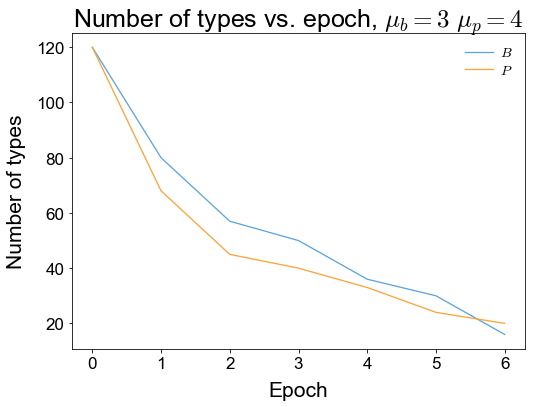

In [62]:
plt.figure()
plt.plot(np.sum(exp_data['b_alive'],axis=0),label='$B$')
plt.plot(np.sum(exp_data['p_alive'],axis=0),label='$P$')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Number of types')
plt.title('Number of types vs. epoch, $\mu_b = {}$ $\mu_p = {}$'.format(exp_data['mu_b'],exp_data['mu_p']))

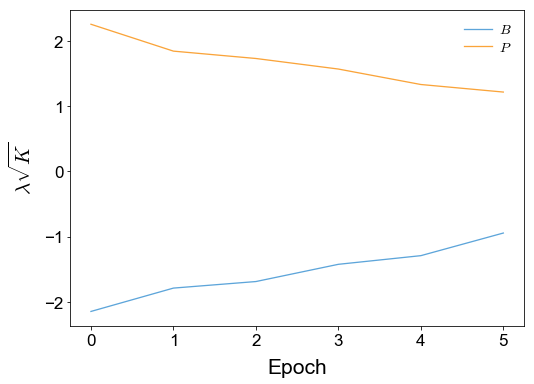

In [63]:
plt.figure()
plt.plot(exp_data['lambda_b_mean_ave_list']*np.sqrt(np.sum(exp_data['b_alive'][:,1:],axis=0)),label='$B$')
plt.plot(exp_data['lambda_p_mean_ave_list']*np.sqrt(np.sum(exp_data['p_alive'][:,1:],axis=0)),label='$P$')
plt.ylabel('$\lambda\sqrt{K}$')
plt.xlabel('Epoch')
plt.legend()

In [64]:
exp_data['ws']

array([[-0.44292324,  0.44667058, -0.54763815, ..., -0.26810815,
        -0.11464908, -0.69823742],
       [-0.20151359, -0.32902907,  0.10780591, ..., -0.56131107,
        -0.05287637,  0.05625962],
       [ 0.06310818, -0.03669415, -0.56937629, ...,  0.04753284,
         0.51077509, -0.49857999],
       ...,
       [-0.1541302 , -0.32666088,  0.31290078, ...,  0.32297419,
        -0.18514433,  0.00466867],
       [ 0.67121145, -0.14577371, -0.17433984, ..., -0.50418656,
         0.03947515,  0.43432555],
       [ 0.19580405,  0.21329307, -0.02989243, ..., -0.21333598,
         0.21638456,  0.0850472 ]])

In [65]:
N_b = np.exp(-thresh_b)
t_max = exp_data['dt_list'][0]*np.shape(exp_data['b_traj_eq'])[1]

Text(0.5,1.03,'Bact. dynamics early times')

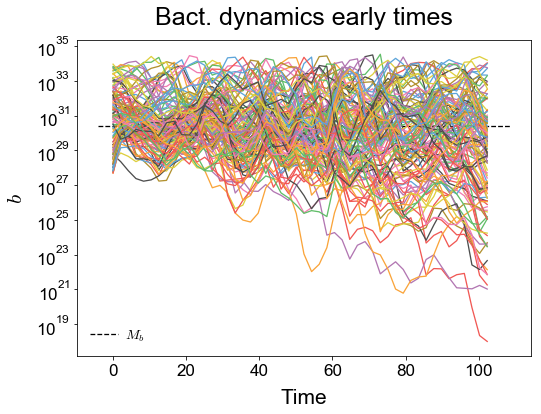

In [66]:
# initial timepoints

t_num = 50

plt.figure()
plt.plot(exp_data['dt_list'][0]*np.arange(t_num),N_b*exp_data['b_traj_eq'][:,0:t_num].T)
plt.yscale('log')
plt.hlines(y = N_b*np.exp(-M_b),xmin=-0.04*exp_data['dt_list'][0]*t_num,
           xmax=1.04*exp_data['dt_list'][0]*t_num,
           linestyle='--',color='k',label='$M_b$')
plt.legend()
plt.xlabel('Time')
plt.ylabel('$b$')
plt.title('Bact. dynamics early times',y=1.03)

Text(0.5,1.03,'Bact. dynamics first evolutionary point')

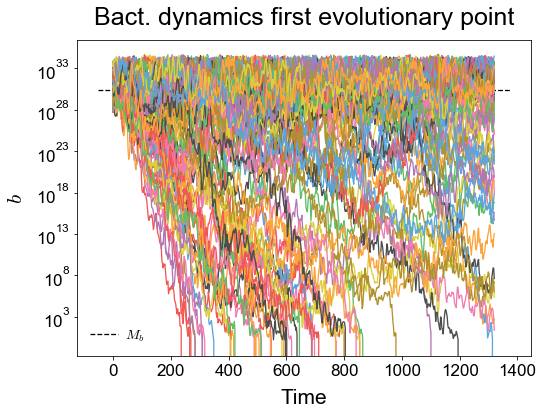

In [67]:
plt.figure()
plt.plot(exp_data['dt_list'][0]*np.arange(np.shape(exp_data['b_traj_eq'])[1]),N_b*exp_data['b_traj_eq'].T)
plt.yscale('log')
plt.hlines(y = N_b*np.exp(-M_b),xmin=-0.04*t_max,
           xmax=1.04*t_max,
           linestyle='--',color='k',label='$M_b$')
plt.legend()
plt.xlabel('Time')
plt.ylabel('$b$')
plt.title('Bact. dynamics first evolutionary point',y=1.03)

In [227]:
N_p = np.exp(-thresh_p)
t_max = exp_data['dt_list'][0]*np.shape(exp_data['p_traj_eq'])[1]

Text(0.5,1.03,'Phage dynamics first evolutionary point')

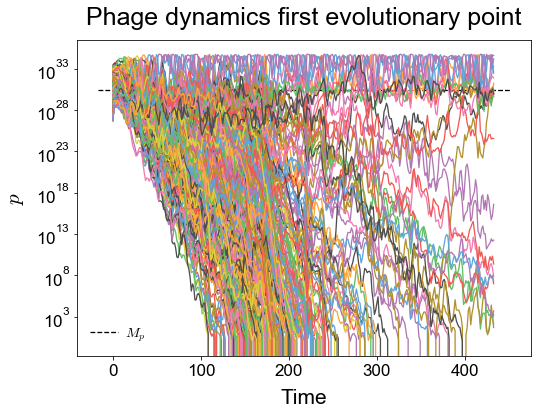

In [228]:
plt.figure()
plt.plot(exp_data['dt_list'][0]*np.arange(np.shape(exp_data['p_traj_eq'])[1]),N_p*exp_data['p_traj_eq'].T)
plt.yscale('log')
plt.hlines(y = N_b*np.exp(-M_b),xmin=-0.04*t_max,
           xmax=1.04*t_max,
           linestyle='--',color='k',label='$M_p$')
plt.legend()
plt.xlabel('Time')
plt.ylabel('$p$')
plt.title('Phage dynamics first evolutionary point',y=1.03)

In [229]:
N_b = np.exp(-thresh_b)
t_max = exp_data['dt_list'][-1]*np.shape(exp_data['b_traj_f'])[1]

Text(0.5,1.03,'Bact. dynamics final evolutionary point')

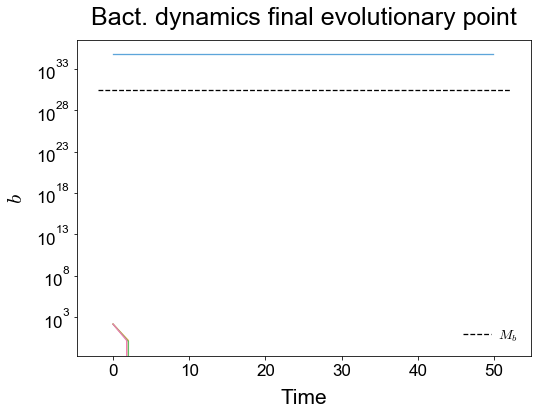

In [230]:
plt.figure()
plt.plot(exp_data['dt_list'][-1]*np.arange(np.shape(exp_data['b_traj_f'])[1]),N_b*exp_data['b_traj_f'].T)
plt.yscale('log')
plt.hlines(y = N_b*np.exp(-M_b),xmin=-0.04*t_max,
           xmax=1.04*t_max,
           linestyle='--',color='k',label='$M_b$')
plt.legend()
plt.xlabel('Time')
plt.ylabel('$b$')
plt.title('Bact. dynamics final evolutionary point',y=1.03)

In [231]:
N_p = np.exp(-thresh_p)
t_max = exp_data['dt_list'][-1]*np.shape(exp_data['p_traj_f'])[1]

Text(0.5,1.03,'Phage dynamics final evolutionary point')

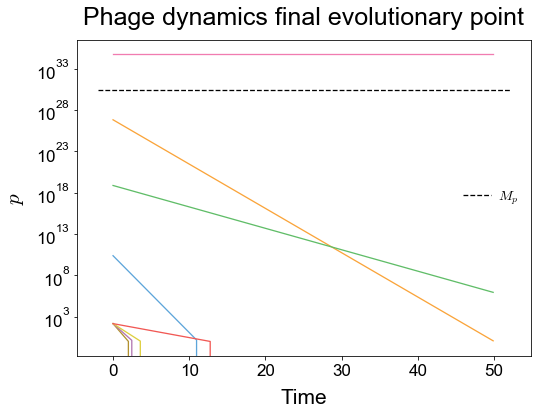

In [232]:
plt.figure()
plt.plot(exp_data['dt_list'][-1]*np.arange(np.shape(exp_data['p_traj_f'])[1]),N_p*exp_data['p_traj_f'].T)
plt.yscale('log')
plt.hlines(y = N_b*np.exp(-M_b),xmin=-0.04*t_max,
           xmax=1.04*t_max,
           linestyle='--',color='k',label='$M_p$')
plt.legend()
plt.xlabel('Time')
plt.ylabel('$p$')
plt.title('Phage dynamics final evolutionary point',y=1.03)

### Non-smooth phenotype

In contrast, for a non-smooth phenotype (like a step function interaction as below), the ecological dynamics
behaves as expected extrapolating from the bacteria-phage model 

In [70]:
D = 20
B = 200
P = 200
F = 8
M_b = 10
M_p = 10
omega_b = 1.0
omega_p = 1.0
thresh_b = -8.0*M_b
thresh_p = -8.0*M_p
inv_fac_b = np.exp(5.0)
inv_fac_p = np.exp(5.0)
dt = 0.1
mu_b = 3
mu_p = 4
D_b = 0.01
D_p = 0.01
seed = 101
epoch_timescale = 20.
epoch_num = 10
sample_num = 20


file_name = 'bp_evo_test_sharp_pheno_mut'

# interaction function

gamma = -0.9

def dist(v,w):
    return np.sqrt(2*(1-np.dot(v,w)))

l_c = 1.0

def S(v,w):
    np.random.seed(hash(str(v)+str(w))%(2**31))
    if dist(v,w)<l_c:
        S_val = 1
    else:
        S_val = 0
    
    Z_1 = np.random.randn()
    Z_2 = np.random.randn()
    
    G = (np.sqrt(-gamma)+np.sqrt(1+gamma)*Z_1)*S_val
    H = (-np.sqrt(-gamma)+np.sqrt(1+gamma)*Z_2)*S_val
    
    np.random.seed()
    return G,H

# set timescales properly
v,w = gen_random_phenos(F,100,100)
G,H = int_from_pheno(S,v,w)

sig_G = np.sqrt(np.var(G))
sig_H = np.sqrt(np.var(H))

time_fac = 2./(sig_G+sig_H) 

epoch_timescale = epoch_timescale*time_fac
dt = dt*time_fac

In [71]:

seed = 100

ie.bp_evo(file_name, D, B, P, F, M_b, M_p, omega_b, omega_p, thresh_b, thresh_p,
              inv_fac_b, inv_fac_p, dt, mu_b, mu_p,D_b, D_p, S, seed, epoch_timescale, epoch_num, sample_num)

/home/atish/Dropbox/Ecology/Bacteria phage code/island-evo/island_evo_simulation_methods.py:1629: RuntimeWarning: divide by zero encountered in true_divide
  temp_rats = np.divide(pbar, p0)  # remove infinities
/home/atish/Dropbox/Ecology/Bacteria phage code/island-evo/island_evo_simulation_methods.py:1990: RuntimeWarning: divide by zero encountered in log
  x = np.log(n)
/home/atish/Dropbox/Ecology/Bacteria phage code/island-evo/island_evo_simulation_methods.py:1629: RuntimeWarning: invalid value encountered in true_divide
  temp_rats = np.divide(pbar, p0)  # remove infinities
/home/atish/Dropbox/Ecology/Bacteria phage code/island-evo/island_evo_simulation_methods.py:1621: RuntimeWarning: divide by zero encountered in true_divide
  temp_rats = np.divide(bbar, b0)  # remove infinities
/home/atish/Dropbox/Ecology/Bacteria phage code/island-evo/island_evo_simulation_methods.py:1621: RuntimeWarning: invalid value encountered in true_divide
  temp_rats = np.divide(bbar, b0)  # remove infin

1
2
3
4
5
6
7
8
9
10
11


In [72]:
with np.load(file_name+'.npz') as data:
    exp_data = data['class_obj'].item()


In [73]:
exp_data.keys()

dict_keys(['file_name', 'D', 'B', 'P', 'F', 'M_b', 'M_p', 'omega_b', 'omega_p', 'thresh_b', 'thresh_p', 'inv_fac_b', 'inv_fac_p', 'epoch_timescale', 'epoch_num', 'dt', 'mu_b', 'mu_p', 'D_b', 'D_p', 'S', 'seed', 'sample_num', 'N', 'm_b', 'm_p', 'B_tot', 'P_tot', 'vs', 'ws', 'increment', 'dt_list', 'epoch_time_list', 'lambda_b_mean_ave_list', 'lambda_b_mean_std_list', 'lambda_p_mean_ave_list', 'lambda_p_mean_std_list', 'b_init_list', 'b_mean_ave_list', 'b2_mean_ave_list', 'b_mig_mean_list', 'eta_b_list', 'b_mean_std_list', 'b2_mean_std_list', 'b_extinct_time_array', 'b_alive', 'p_init_list', 'p_mean_ave_list', 'p2_mean_ave_list', 'p_mig_mean_list', 'eta_p_list', 'p_mean_std_list', 'p2_mean_std_list', 'p_extinct_time_array', 'p_alive', 'b_traj_eq', 'p_traj_eq', 'b_traj_f', 'p_traj_f'])

Text(0.5,1,'Number of types vs. epoch, $\\mu_b = 3$ $\\mu_p = 4$')

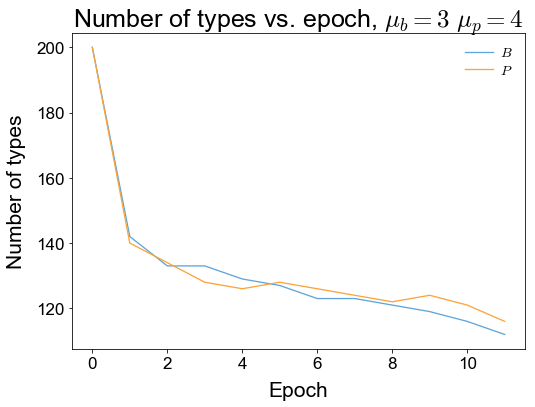

In [74]:
plt.figure()
plt.plot(np.sum(exp_data['b_alive'],axis=0),label='$B$')
plt.plot(np.sum(exp_data['p_alive'],axis=0),label='$P$')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Number of types')
plt.title('Number of types vs. epoch, $\mu_b = {}$ $\mu_p = {}$'.format(exp_data['mu_b'],exp_data['mu_p']))

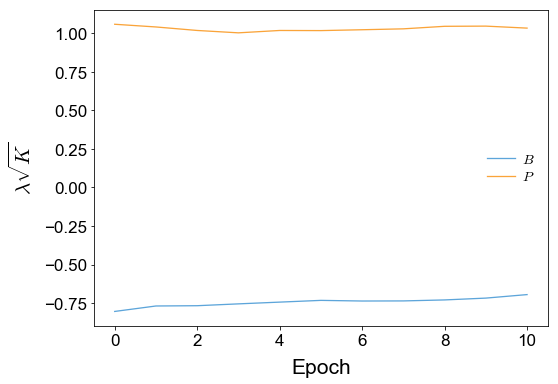

In [75]:
plt.figure()
plt.plot(exp_data['lambda_b_mean_ave_list']*np.sqrt(np.sum(exp_data['b_alive'][:,1:],axis=0)),label='$B$')
plt.plot(exp_data['lambda_p_mean_ave_list']*np.sqrt(np.sum(exp_data['p_alive'][:,1:],axis=0)),label='$P$')
plt.ylabel('$\lambda\sqrt{K}$')
plt.xlabel('Epoch')
plt.legend()

In [76]:
exp_data['ws']

array([[-0.40892157,  0.4571853 ,  0.22137043, ...,  0.03140595,
         0.40502021, -0.00404374],
       [ 0.24514933,  0.17835229, -0.02602377, ..., -0.12759086,
         0.34816851,  0.44258971],
       [-0.02697286, -0.1658816 ,  0.17430984, ...,  0.22699529,
         0.37554624,  0.05444833],
       ...,
       [ 0.62798408,  0.26881462,  0.29311366, ...,  0.16264009,
         0.16356728,  0.38151972],
       [-0.45852296,  0.27109181,  0.57804054, ...,  0.43049436,
        -0.06693438,  0.63440081],
       [-0.02578893,  0.76241615,  0.13866572, ..., -0.08988518,
         0.34250473, -0.14883863]])

In [77]:
N_b = np.exp(-thresh_b)
t_max = exp_data['dt_list'][0]*np.shape(exp_data['b_traj_eq'])[1]

Text(0.5,1.03,'Bact. dynamics first evolutionary point')

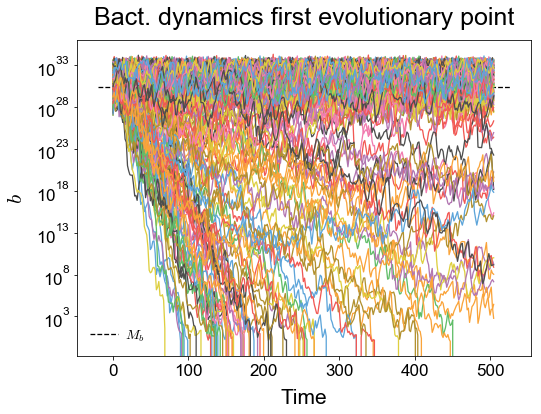

In [78]:
plt.figure()
plt.plot(exp_data['dt_list'][0]*np.arange(np.shape(exp_data['b_traj_eq'])[1]),N_b*exp_data['b_traj_eq'].T)
plt.yscale('log')
plt.hlines(y = N_b*np.exp(-M_b),xmin=-0.04*t_max,
           xmax=1.04*t_max,
           linestyle='--',color='k',label='$M_b$')
plt.legend()
plt.xlabel('Time')
plt.ylabel('$b$')
plt.title('Bact. dynamics first evolutionary point',y=1.03)

In [261]:
N_p = np.exp(-thresh_p)
t_max = exp_data['dt_list'][0]*np.shape(exp_data['p_traj_eq'])[1]

Text(0.5,1.03,'Phage dynamics first evolutionary point')

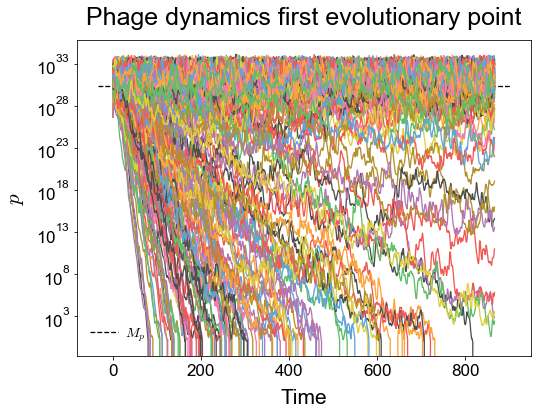

In [262]:
plt.figure()
plt.plot(exp_data['dt_list'][0]*np.arange(np.shape(exp_data['p_traj_eq'])[1]),N_p*exp_data['p_traj_eq'].T)
plt.yscale('log')
plt.hlines(y = N_b*np.exp(-M_b),xmin=-0.04*t_max,
           xmax=1.04*t_max,
           linestyle='--',color='k',label='$M_p$')
plt.legend()
plt.xlabel('Time')
plt.ylabel('$p$')
plt.title('Phage dynamics first evolutionary point',y=1.03)

In [263]:
N_b = np.exp(-thresh_b)
t_max = exp_data['dt_list'][-1]*np.shape(exp_data['b_traj_f'])[1]

Text(0.5,1.03,'Bact. dynamics final evolutionary point')

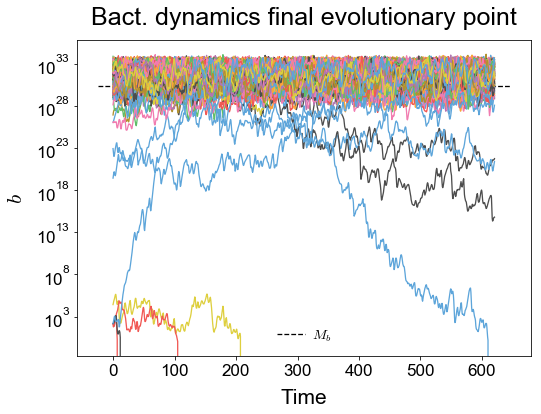

In [264]:
plt.figure()
plt.plot(exp_data['dt_list'][-1]*np.arange(np.shape(exp_data['b_traj_f'])[1]),N_b*exp_data['b_traj_f'].T)
plt.yscale('log')
plt.hlines(y = N_b*np.exp(-M_b),xmin=-0.04*t_max,
           xmax=1.04*t_max,
           linestyle='--',color='k',label='$M_b$')
plt.legend()
plt.xlabel('Time')
plt.ylabel('$b$')
plt.title('Bact. dynamics final evolutionary point',y=1.03)

In [265]:
N_p = np.exp(-thresh_p)
t_max = exp_data['dt_list'][-1]*np.shape(exp_data['p_traj_f'])[1]

Text(0.5,1.03,'Phage dynamics final evolutionary point')

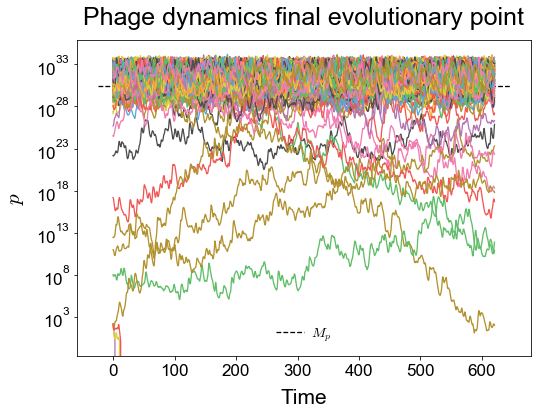

In [266]:
plt.figure()
plt.plot(exp_data['dt_list'][-1]*np.arange(np.shape(exp_data['p_traj_f'])[1]),N_p*exp_data['p_traj_f'].T)
plt.yscale('log')
plt.hlines(y = N_b*np.exp(-M_b),xmin=-0.04*t_max,
           xmax=1.04*t_max,
           linestyle='--',color='k',label='$M_p$')
plt.legend()
plt.xlabel('Time')
plt.ylabel('$p$')
plt.title('Phage dynamics final evolutionary point',y=1.03)